In [2]:
# Start by importing the packages we'll need.
import numpy as np
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2] # Only use the first two features.
y = y[y != 0]     # Ignore the first class.
y[y==2] = -1      # Change class label to -1 for SVM.

n_sample = len(X) # Total number of data points.

# Split data into training and testing sets.
#np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.7 * n_sample)]
y_train = y[:int(.7 * n_sample)]
X_test = X[int(.7 * n_sample):]
y_test = y[int(.7 * n_sample):]

In [3]:
def accuracy(y_pred, y_test):
    """
    Computes the accuracy on the test set given the class predictions.
    
    Input:
        y_pred: np.ndarray(n,), vector of predicted class labels
        y_test: np.ndarray(n,), vector of true class labels
    
    Output:
        float, accuracy of predictions
    """
    return np.mean(y_pred * y_test > 0)


SVM with linear kernel, accuracy = 73.33%
SVM with rbf kernel, accuracy = 70.00%
SVM with poly kernel, accuracy = 73.33%


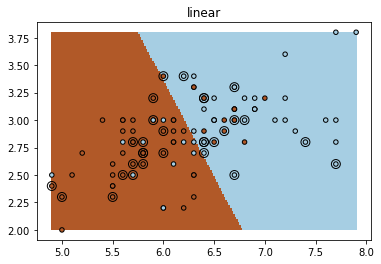

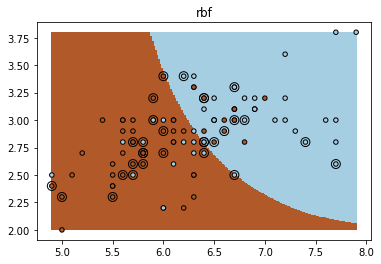

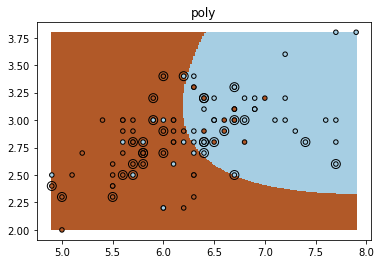

In [4]:
kernel_list = ['linear', 'rbf', 'poly']

for kernel in kernel_list:
    model = svm.SVC(C=10, kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("SVM with {:s} kernel, accuracy = {:0.2f}%".format(
        kernel, 100 * accuracy(y_pred, y_test)))

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0],
                X[:, 1],
                c=y,
                zorder=10,
                cmap=plt.cm.Paired,
                edgecolor='k',
                s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0],
                X_test[:, 1],
                s=80,
                facecolors='none',
                zorder=10,
                edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    XXYY = np.c_[XX.ravel(), YY.ravel()]
    Z = model.predict(XXYY)

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading='auto')
    plt.title(kernel)

plt.show()

In [6]:
print(np.ndarray(5))
# print(np.zeros(5))

[0. 0. 0. 0. 0.]
